In [1]:
import sys
sys.path.append('../..')
sys.path.append('../data')
sys.path.append('../../helper_code')

from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
import numpy as np
import pandas as pd
from IPython.display import display
import copy
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from helper_code.custom_kernel import create_similarity_matrix_nb, extended_gaussian_kernel_nb
from helper_code.util import evaluate_performance, evaluate_performance_custom_kernel

In [2]:
input_dataset = ['c', 'c_lexi', 'CE', 'CE_lexi', 'CSE', 'CSE_lexi']
dataset_dict = {}

for data in input_dataset:
    dataset_dict[data] = pd.read_csv(f'../data/coronene_training_data/{data}.csv')

D_etot = pd.read_csv(f'../data/coronene_training_data/delta_total_energy.csv')
DD_etot = pd.read_csv(f'../data/coronene_training_data/DD_e_tot.csv')

In [3]:
model_collection = {}
performance_summary = {}

## CSE with Gaussian ##

### No Lexi, D_etot ###

In [4]:
X = dataset_dict['CSE'].to_numpy()
y = D_etot.to_numpy()

best_params = {'alpha': 2.2425013674157485e-08, 'gamma': 8.136151536502313e-08, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 11)]
num_trials = 5

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_Gaussian'] = model
performance_summary['ANM_CSE_Gaussian'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,130.019314,2.978377
2,128,130.040839,16.921002
3,256,138.837137,26.585606
4,512,121.413996,9.364519
5,1024,109.489586,2.348336


### With Lexi, D_etot ###

In [5]:
X = dataset_dict['CSE_lexi'].to_numpy()
y = D_etot.to_numpy()

best_params = {'alpha': 1.5182042161569614e-12, 'gamma': 6.03689365016129e-10, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 11)]
num_trials = 5

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_lexi_Gaussian'] = model
performance_summary['ANM_CSE_lexi_Gaussian'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,137.350192,5.065702
2,128,127.947445,18.409108
3,256,134.069281,22.53752
4,512,120.311838,7.907089
5,1024,108.973788,2.282649


### With Lexi, DD_etot ###

In [6]:
X = dataset_dict['CSE_lexi'].to_numpy()
y = DD_etot.to_numpy()

best_params = {'alpha': 0.0025629074500422688, 'gamma': 1.8104490522288843e-07, 'kernel': 'rbf'}
model = KernelRidge(**best_params)

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 11)]
num_trials = 5

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance(model, X, y, num_training_sample, num_trials)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_lexi_Gaussian_delta'] = model
performance_summary['ANM_CSE_lexi_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,115.89853,0.654999
2,128,112.637022,1.589391
3,256,108.639782,3.449157
4,512,103.340788,2.119503
5,1024,100.330682,1.893908


## CSE with Extended Gaussian ##

### With Lexi, DD_etot ###

In [7]:
X = dataset_dict['CSE_lexi']
y = DD_etot

best_params = {'alpha': 0.00028513857657025936, 'beta': 1.1753499166909471e-08, 'epsilon': 3.0350353283034606e-06, 'gamma': 1.1611337892690983e-07}
model = KernelRidge(kernel='precomputed', alpha=best_params['alpha'])

columns = ['training size', 'average MAE (mHa)', 'standard deviation (mHa)']
model_performance = pd.DataFrame(columns=columns)

training_size = [2**i for i in range(6, 11)]
num_trials = 5

with warnings.catch_warnings():
    for index, num_training_sample in enumerate(training_size):
        warnings.filterwarnings("ignore")
        index = index + 1
        average_error, std_dev_error = evaluate_performance_custom_kernel(model, X, y, num_training_sample, num_trials, extended_gaussian_kernel_nb, best_params)
        model_performance.at[index, 'training size'] = num_training_sample
        model_performance.at[index, 'average MAE (mHa)'] = average_error * 1000
        model_performance.at[index, 'standard deviation (mHa)'] = std_dev_error * 1000

model_collection['ANM_CSE_lexi_ex_Gaussian_delta'] = model
performance_summary['ANM_CSE_lexi_ex_Gaussian_delta'] = model_performance

display(model_performance)

,training size,average MAE (mHa),standard deviation (mHa)
1,64,103.544772,1.683056
2,128,107.020072,6.15929
3,256,99.096768,1.081236
4,512,98.301844,0.833664
5,1024,97.418472,0.906452


## Learning Curve ##

In [8]:
print(performance_summary.keys())

dict_keys(['ANM_CSE_Gaussian', 'ANM_CSE_lexi_Gaussian', 'ANM_CSE_lexi_Gaussian_delta', 'ANM_CSE_lexi_ex_Gaussian_delta'])


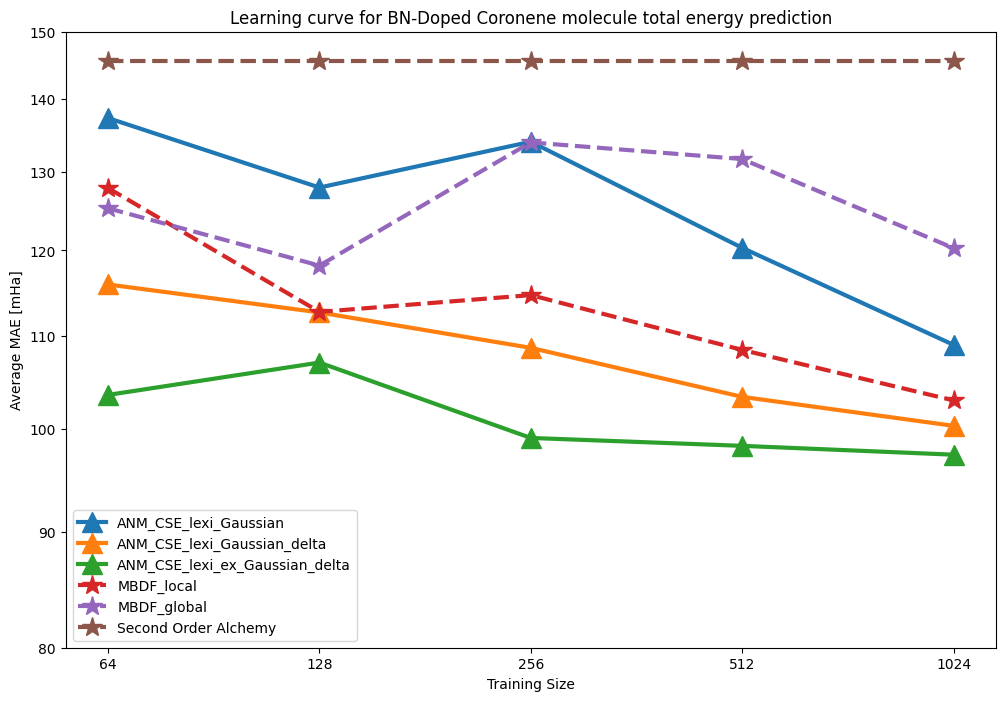

In [9]:
# performance_summary.pop("ANM_CSE_lexi_nd_Gaussian_delta")

target_key = ['ANM_CSE_lexi_Gaussian', 'ANM_CSE_lexi_Gaussian_delta', 'ANM_CSE_lexi_ex_Gaussian_delta']

plt.figure(figsize=(12, 8))

baseline = {# 'CM': [648.5527354673592, 537.6985692537448, 461.0180882987335, 379.9858538857778, 293.8438973546341, 241.82578139489823], 
            # 'BOB': [237.41250993141233, 175.25626039916506, 151.71095095761646, 138.19860398430035, 119.94745348162638, 104.37619882451854], 
            'MBDF_local': [127.88290189041615, 112.70106098051316, 114.6497765621566, 108.41004077116486, 102.96608614634413], 
            'MBDF_global': [125.26974283956454, 118.15332355413486, 133.97873856262075, 131.72268889383403, 120.28243259836677],
            'Second Order Alchemy': [145.62546462994108] * 5}

x = performance_summary['ANM_CSE_lexi_ex_Gaussian_delta']['training size']
y_values = {}
baseline_y = {}
for key, df in performance_summary.items():
    if key in target_key:
        y_values[key] = df['average MAE (mHa)']
for key, value in baseline.items():
    baseline_y[key] = value

linewidth = 3
markersize = 15

for key, y_value in y_values.items():
    plt.plot(x, y_value, label=key, marker='^', linestyle='-', linewidth=linewidth, markersize=markersize)
for key, y_value in baseline_y.items():
    plt.plot(x, y_value, label=key, marker='*', linestyle='--', linewidth=linewidth, markersize=markersize) 


plt.title('Learning curve for BN-Doped Coronene molecule total energy prediction')
plt.xlabel('Training Size')
plt.ylabel('Average MAE [mHa]')
plt.legend()

plt.xscale('log', base=2)
plt.yscale('log', base=10)
xticks = [2**i for i in range(6, 11)]
yticks = [80, 90, 100, 110, 120, 130, 140, 150]
plt.xticks(xticks, labels = xticks)
plt.yticks(yticks, labels = yticks)

plt.savefig('../graph/[Coronene] [9.0] Learning curve for BN-Doped Coronene molecule total energy prediction.png', dpi=300)
plt.show()